In [1]:
import ee
import geemap


In [2]:
ee.Initialize()

In [3]:
from geeopca import ee_datasets


aoi = ee.Geometry.Polygon(
    [
        [-77.4467, 44.1024],
        [-77.4467, 44.2352],
        [-77.2686, 44.2352],
        [-77.2686, 44.1024],
        [-77.4467, 44.1024],
    ]
)

DATES = [(f'{year}-04-01', f'{year}-10-31') for year in range(2017, 2024)]

s2_dataset = ee_datasets.get_s2_toa(aoi, dates=DATES)


In [4]:
from geeopca import datautils as du

gdf = du.image_collection_to_dataframe(s2_dataset)
gdf.head()

,geometry,sysid,system_prefix,utc,system_index
0,"POLYGON ((-77.44500 44.22733, -77.44502 44.227...",20170611T161351_20170611T161345_T18TUP,COPERNICUS/S2_HARMONIZED,1497197625460,COPERNICUS/S2_HARMONIZED/20170611T161351_20170...
1,"POLYGON ((-77.48083 44.13854, -77.48077 44.138...",20170611T161351_20170611T161345_T18TUQ,COPERNICUS/S2_HARMONIZED,1497197625460,COPERNICUS/S2_HARMONIZED/20170611T161351_20170...
2,"POLYGON ((-77.50419 44.22598, -77.50420 44.225...",20170621T161341_20170621T161517_T18TUP,COPERNICUS/S2_HARMONIZED,1498061717260,COPERNICUS/S2_HARMONIZED/20170621T161341_20170...
3,"POLYGON ((-77.43574 44.22753, -77.43577 44.227...",20170701T161341_20170701T161454_T18TUP,COPERNICUS/S2_HARMONIZED,1498925694610,COPERNICUS/S2_HARMONIZED/20170701T161341_20170...
4,"POLYGON ((-77.51674 44.52233, -77.51686 44.522...",20170721T161351_20170721T162051_T18TUQ,COPERNICUS/S2_HARMONIZED,1500654051180,COPERNICUS/S2_HARMONIZED/20170721T161351_20170...


In [5]:
gdf = du.process_date_time(gdf)
gdf.head()

,geometry,sysid,system_prefix,utc,system_index,x,y,timezone,timestamp,year,julian_date
0,"POLYGON ((-77.44500 44.22733, -77.44502 44.227...",20170611T161351_20170611T161345_T18TUP,COPERNICUS/S2_HARMONIZED,1.497198e+09,COPERNICUS/S2_HARMONIZED/20170611T161351_20170...,-77.482410,44.181806,America/Toronto,2017-06-11 12:13:45.460000038-04:00,2017,162
1,"POLYGON ((-77.48083 44.13854, -77.48077 44.138...",20170611T161351_20170611T161345_T18TUQ,COPERNICUS/S2_HARMONIZED,1.497198e+09,COPERNICUS/S2_HARMONIZED/20170611T161351_20170...,-77.372628,44.786364,America/Toronto,2017-06-11 12:13:45.460000038-04:00,2017,162
2,"POLYGON ((-77.50419 44.22598, -77.50420 44.225...",20170621T161341_20170621T161517_T18TUP,COPERNICUS/S2_HARMONIZED,1.498062e+09,COPERNICUS/S2_HARMONIZED/20170621T161341_20170...,-77.479250,44.175426,America/Toronto,2017-06-21 12:15:17.259999990-04:00,2017,172
3,"POLYGON ((-77.43574 44.22753, -77.43577 44.227...",20170701T161341_20170701T161454_T18TUP,COPERNICUS/S2_HARMONIZED,1.498926e+09,COPERNICUS/S2_HARMONIZED/20170701T161341_20170...,-77.478795,44.174386,America/Toronto,2017-07-01 12:14:54.609999895-04:00,2017,182
4,"POLYGON ((-77.51674 44.52233, -77.51686 44.522...",20170721T161351_20170721T162051_T18TUQ,COPERNICUS/S2_HARMONIZED,1.500654e+09,COPERNICUS/S2_HARMONIZED/20170721T161351_20170...,-77.453202,44.369485,America/Toronto,2017-07-21 12:20:51.180000067-04:00,2017,202


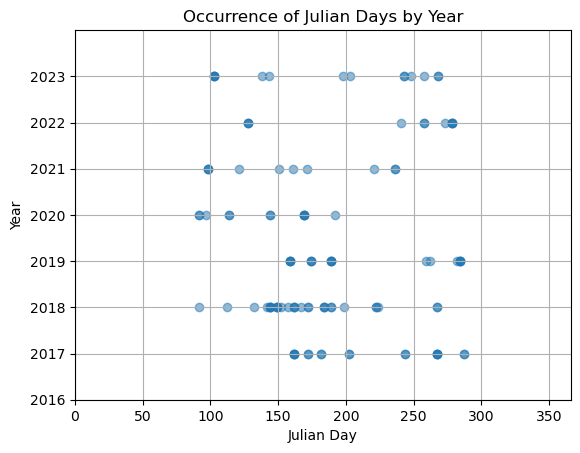

In [6]:
from geeopca import plots

plot = plots.date_time_scatter_plot(gdf)
